..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_003_SavedCycle_1_Resampled_000201.png


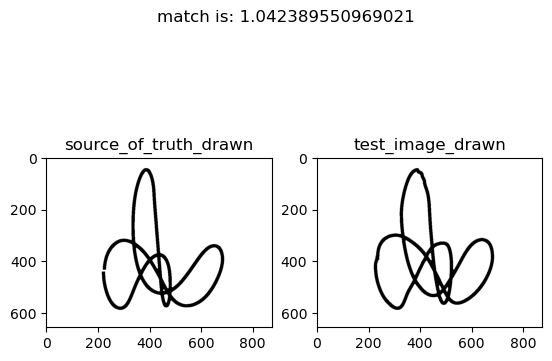

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_003_SavedCycle_2_Resampled_000202.png


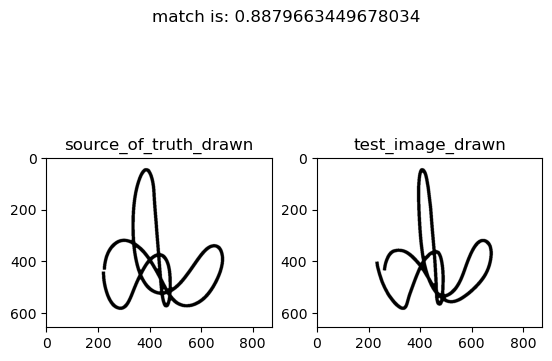

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_003_SavedCycle_3_Resampled_000203.png


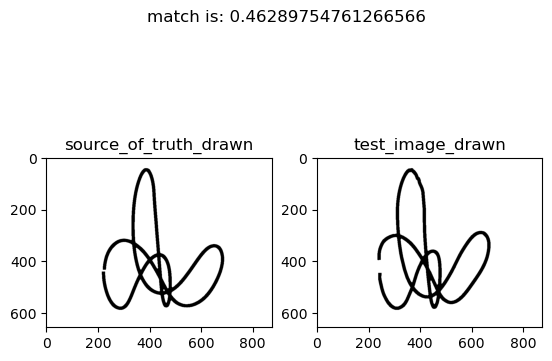

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_003_SavedCycle_4_Resampled_000204.png


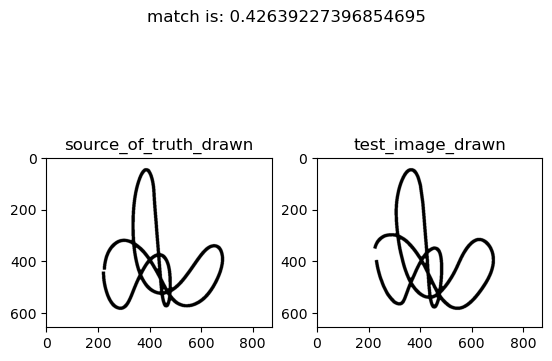

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_003_SavedCycle_5_Resampled_000205.png


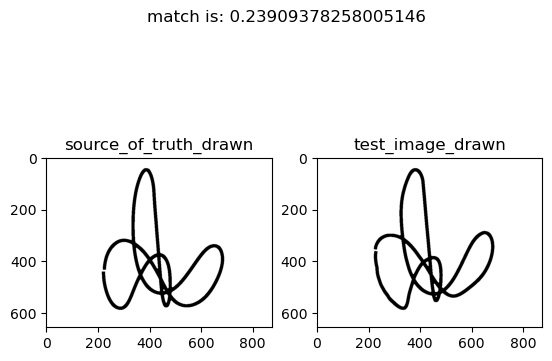

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_004_SavedCycle_1_Resampled_000206.png


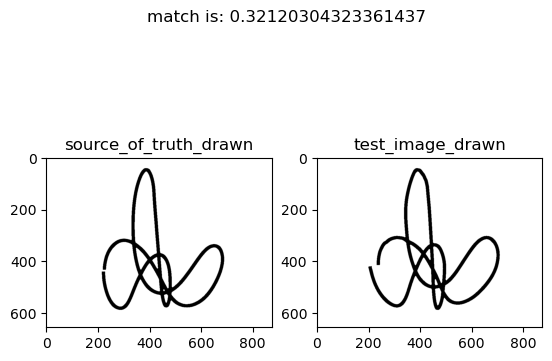

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_004_SavedCycle_2_Resampled_000207.png


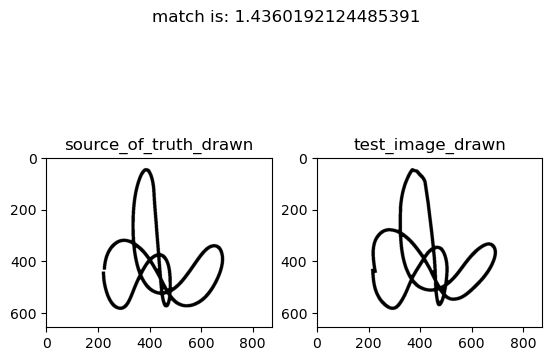

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_004_SavedCycle_3_Resampled_000208.png


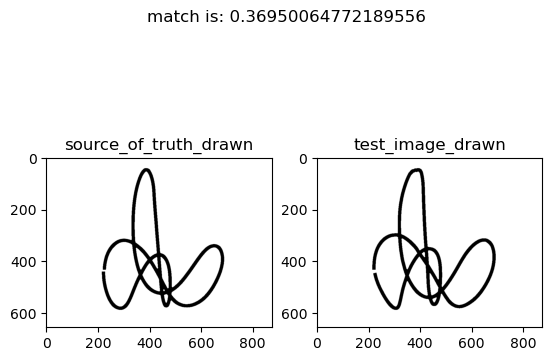

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_004_SavedCycle_4_Resampled_000209.png


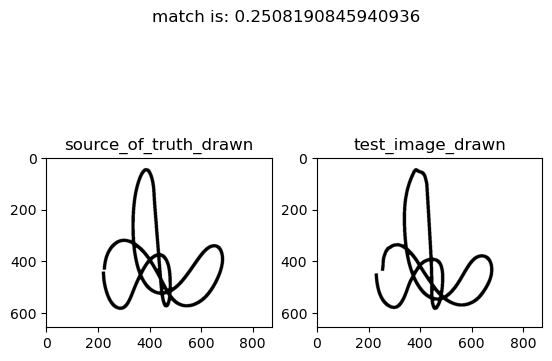

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_004_SavedCycle_5_Resampled_000210.png


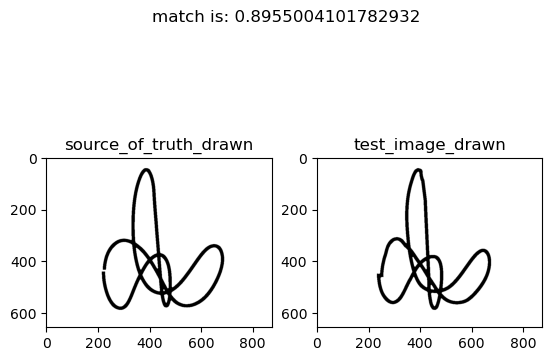

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_005_SavedCycle_1_Resampled_000211.png


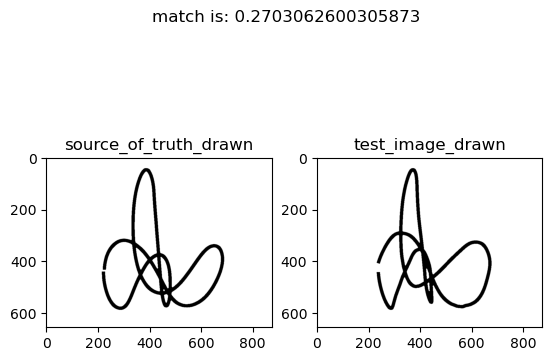

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_005_SavedCycle_2_Resampled_000212.png


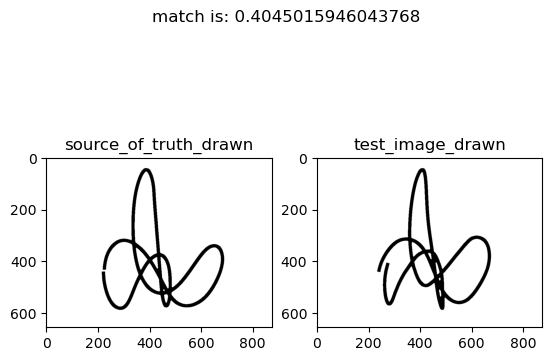

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_005_SavedCycle_3_Resampled_000213.png


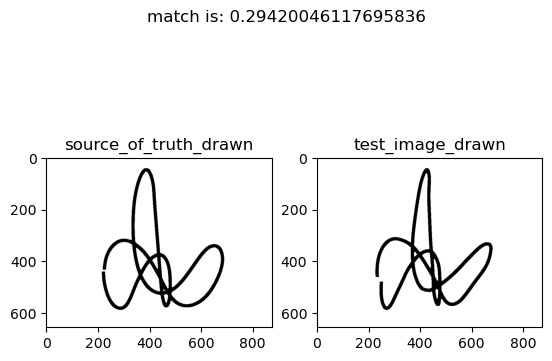

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_005_SavedCycle_4_Resampled_000214.png


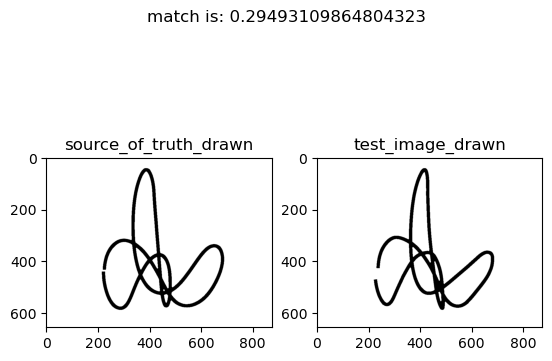

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_005_SavedCycle_5_Resampled_000215.png


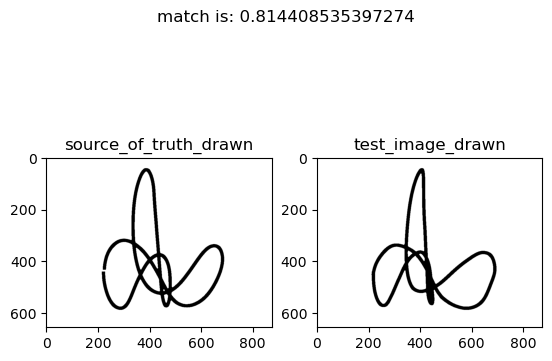

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_006_SavedCycle_1_Resampled_000216.png


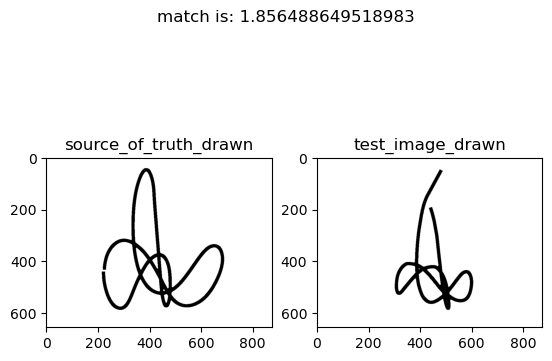

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_006_SavedCycle_2_Resampled_000217.png


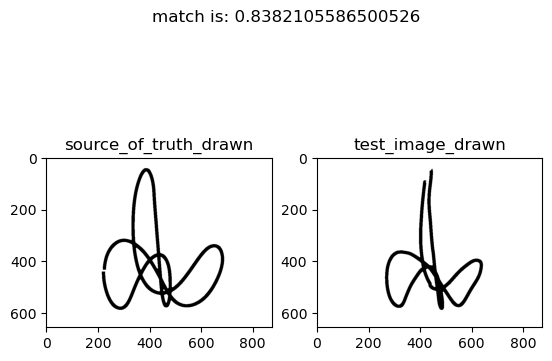

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_006_SavedCycle_3_Resampled_000218.png


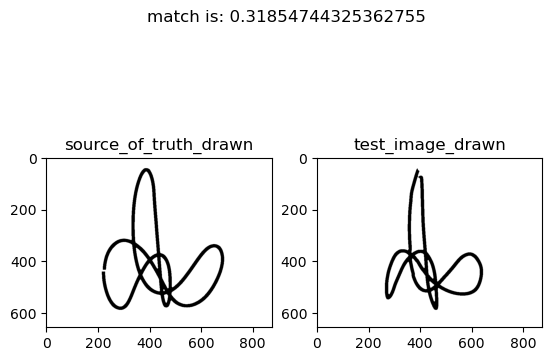

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_006_SavedCycle_4_Resampled_000219.png


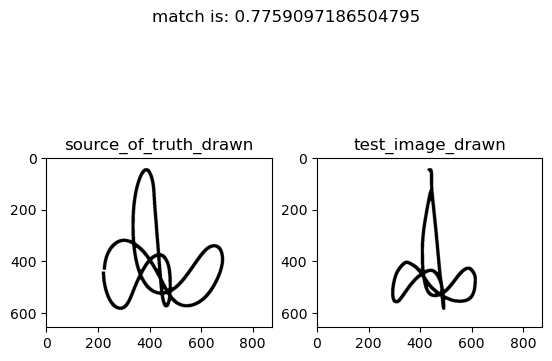

..\Visualisations\Session01_Resampled_Average_Figures\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_006_SavedCycle_5_Resampled_000220.png


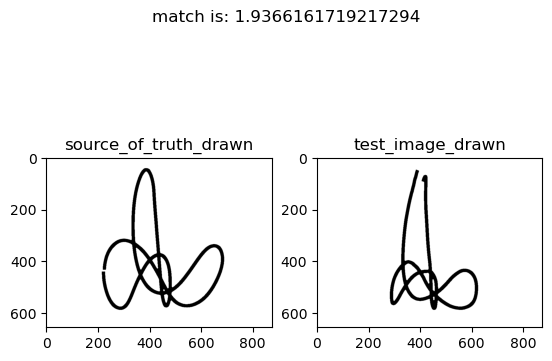

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

test_images = glob.glob("..\\Visualisations\\Session01_Resampled_Average_Figures\\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_0*Resampled_0*.png")

source_of_truth = cv2.imread('..\\Visualisations\\Session01_Resampled_Average_Figures\\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_All_Resampled_Average_000200.png')
assert source_of_truth is not None, "file could not be read, check with os.path.exists()"

source_of_truth = cv2.cvtColor(source_of_truth,cv2.COLOR_BGR2GRAY) #gray scale image
ret1, thresh1 = cv2.threshold(source_of_truth, 127, 255, 0)
source_of_truth_contours_found, contours_truth, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt1 = contours_truth[1]
source_of_truth_drawn = cv2.drawContours(source_of_truth_contours_found, contours_truth, -1, (255,255,255), 3)

for img_fileName in test_images:

    print(img_fileName)
    assert img_fileName is not None, "file could not be read, check with os.path.exists()"
    test_image = cv2.imread(img_fileName)
    test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) #gray scale image
    ret2, thresh2 = cv2.threshold(test_image, 127, 255, 0)
    test_image_contours_found, contours_test, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cnt2 = contours_test[1]

    test_image_drawn = cv2.drawContours(test_image_contours_found, contours_test, -1, (255,255,255), 3)

    # match shpaes
    ret_match = cv2.matchShapes(cnt1,cnt2,1,0.000)
    # print("match is: ", ret_match)

    # plot
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.suptitle("match is: "+ str(ret_match))

    plt.subplot(1,2,1)
    plt.imshow(source_of_truth_drawn, cmap='gray')
    plt.title("source_of_truth_drawn")

    plt.subplot(1,2,2)
    plt.imshow(test_image_drawn, cmap='gray')
    plt.title("test_image_drawn")

    plt.show()


